Importing Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

Loading the database

In [23]:
df_finlandia = pd.read_csv("dataset.csv")

In [24]:
df_finlandia

,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timin Score,Total Sleep Duration,Total Bedtime,...,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score,Cycle Phase
0,72,62,81,87,93,61,78,76,22530,25380,...,86,65,NaN,100.0,NaN,85,91,NaN,97,LP
1,81,76,96,85,81,67,81,100,26250,31200,...,66,88,NaN,100.0,NaN,65,38,NaN,100,LP
2,69,56,75,96,72,71,70,70,20970,26220,...,73,58,65.0,80.0,95.0,99,83,51.0,100,LP
3,79,78,99,80,95,67,72,73,26820,29820,...,92,83,NaN,84.0,NaN,99,100,NaN,100,LP
4,77,66,96,85,96,70,67,91,23700,25980,...,84,78,NaN,85.0,NaN,98,82,NaN,95,LP
5,70,68,72,72,62,68,67,83,24030,31560,...,69,60,70.0,73.0,64.0,100,64,63.0,100,LP
6,85,91,100,92,69,66,83,89,30030,37800,...,83,98,84.0,92.0,76.0,100,65,72.0,100,LP
7,58,59,92,31,55,73,64,21,21840,29820,...,59,30,75.0,90.0,81.0,100,22,51.0,76,LP
8,79,90,96,79,86,69,67,48,29820,34500,...,86,83,84.0,86.0,85.0,100,100,72.0,100,LP
9,62,47,52,79,51,65,70,100,18870,26760,...,71,40,69.0,NaN,96.0,93,100,81.0,43,LP


Data visualization and analysis

In [25]:
df_finlandia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sleep Score                  31 non-null     int64  
 1   Total Sleep Score            31 non-null     int64  
 2   REM Sleep Score              31 non-null     int64  
 3   Deep Sleep Score             31 non-null     int64  
 4   Sleep Efficiency Score       31 non-null     int64  
 5   Restfulness Score            31 non-null     int64  
 6   Sleep Latency Score          31 non-null     int64  
 7   Sleep Timin Score            31 non-null     int64  
 8   Total Sleep Duration         31 non-null     int64  
 9   Total Bedtime                31 non-null     int64  
 10  Awake Time                   31 non-null     int64  
 11  REM Sleep Duration           31 non-null     int64  
 12  Light Sleep Duration         31 non-null     int64  
 13  Deep Sleep Duration   

In [26]:
df_finlandia.isna().sum()

Sleep Score                    0
Total Sleep Score              0
REM Sleep Score                0
Deep Sleep Score               0
Sleep Efficiency Score         0
Restfulness Score              0
Sleep Latency Score            0
Sleep Timin Score              0
Total Sleep Duration           0
Total Bedtime                  0
Awake Time                     0
REM Sleep Duration             0
Light Sleep Duration           0
Deep Sleep Duration            0
Restless Sleep                 0
Sleep Efficiency               0
Sleep Latency                  0
Sleep Timing                   0
Average Resting Heart Rate     0
Lowest Resting Heart Rate      0
Average HRV                    0
Temperature Deviation (C)      0
Temperature Trend Deviation    0
Respiratory Rate               0
Activity Score                 0
Stay Active Score              0
Move Every Hour Score          0
Meet Daily Targets Score       0
Training Frequency Score       0
Training Volume Score          0
Activity B

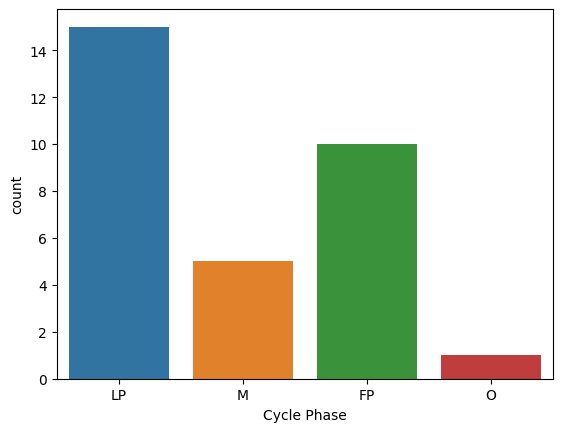

In [27]:
# Quantity of classes in the target column (Cycle Phase)

sns.countplot(x=df_finlandia['Cycle Phase']);

C:\Users\ppmmr\AppData\Local\Temp\ipykernel_23204\11742117.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_finlandia[:-1].corr();


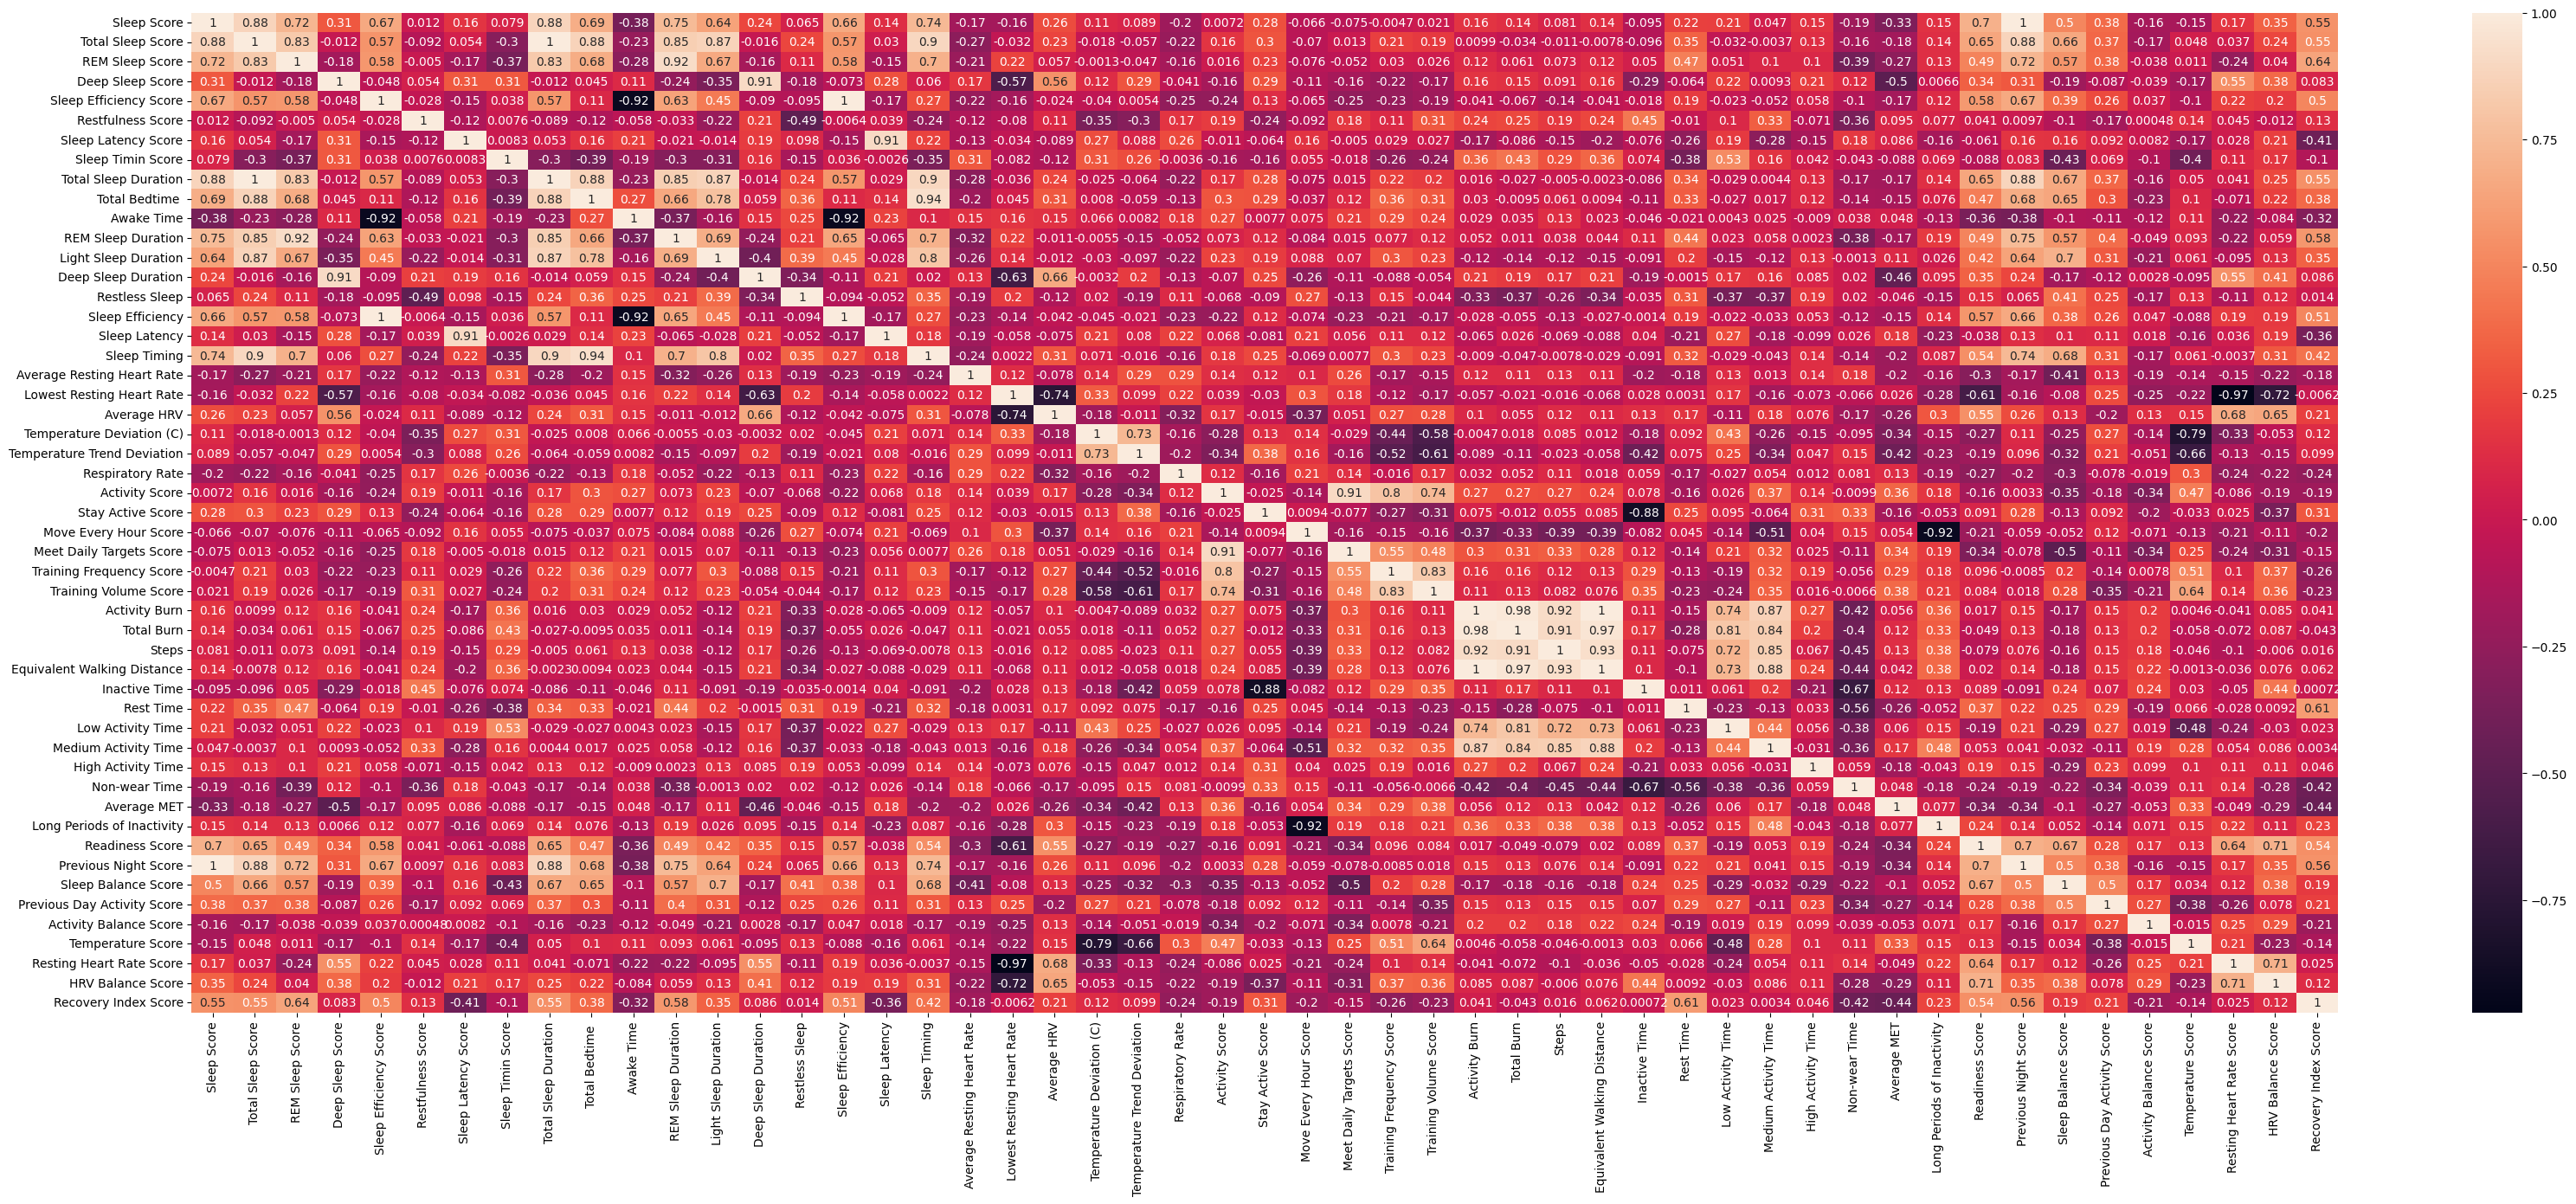

In [28]:
#Correlation of the predictor attributes

correlation = df_finlandia[:-1].corr();
plt.figure(figsize = (40,15));
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True);

In [29]:
X = df_finlandia.iloc[:, 0:51]
y = df_finlandia.iloc[:, 51]

In [30]:
X_imputer = KNNImputer(n_neighbors=2)

X = X_imputer.fit_transform(X)

X = pd.DataFrame(X)

coluns = ['Sleep Score', 'Total Sleep Score', 'REM Sleep Score',
       'Deep Sleep Score', 'Sleep Efficiency Score', 'Restfulness Score',
       'Sleep Latency Score', 'Sleep Timin Score', 'Total Sleep Duration',
       'Total Bedtime ', 'Awake Time', 'REM Sleep Duration',
       'Light Sleep Duration', 'Deep Sleep Duration', 'Restless Sleep',
       'Sleep Efficiency', 'Sleep Latency', 'Sleep Timing',
       'Average Resting Heart Rate', 'Lowest Resting Heart Rate',
       'Average HRV', 'Temperature Deviation (C)',
       'Temperature Trend Deviation', 'Respiratory Rate', 'Activity Score',
       'Stay Active Score', 'Move Every Hour Score',
       'Meet Daily Targets Score', 'Training Frequency Score',
       'Training Volume Score', 'Activity Burn', 'Total Burn', 'Steps',
       'Equivalent Walking Distance', 'Inactive Time', 'Rest Time',
       'Low Activity Time', 'Medium Activity Time', 'High Activity Time',
       'Non-wear Time', 'Average MET', 'Long Periods of Inactivity',
       'Readiness Score', 'Previous Night Score', 'Sleep Balance Score',
       'Previous Day Activity Score', 'Activity Balance Score',
       'Temperature Score', 'Resting Heart Rate Score', 'HRV Balance Score',
       'Recovery Index Score']

X.columns = coluns

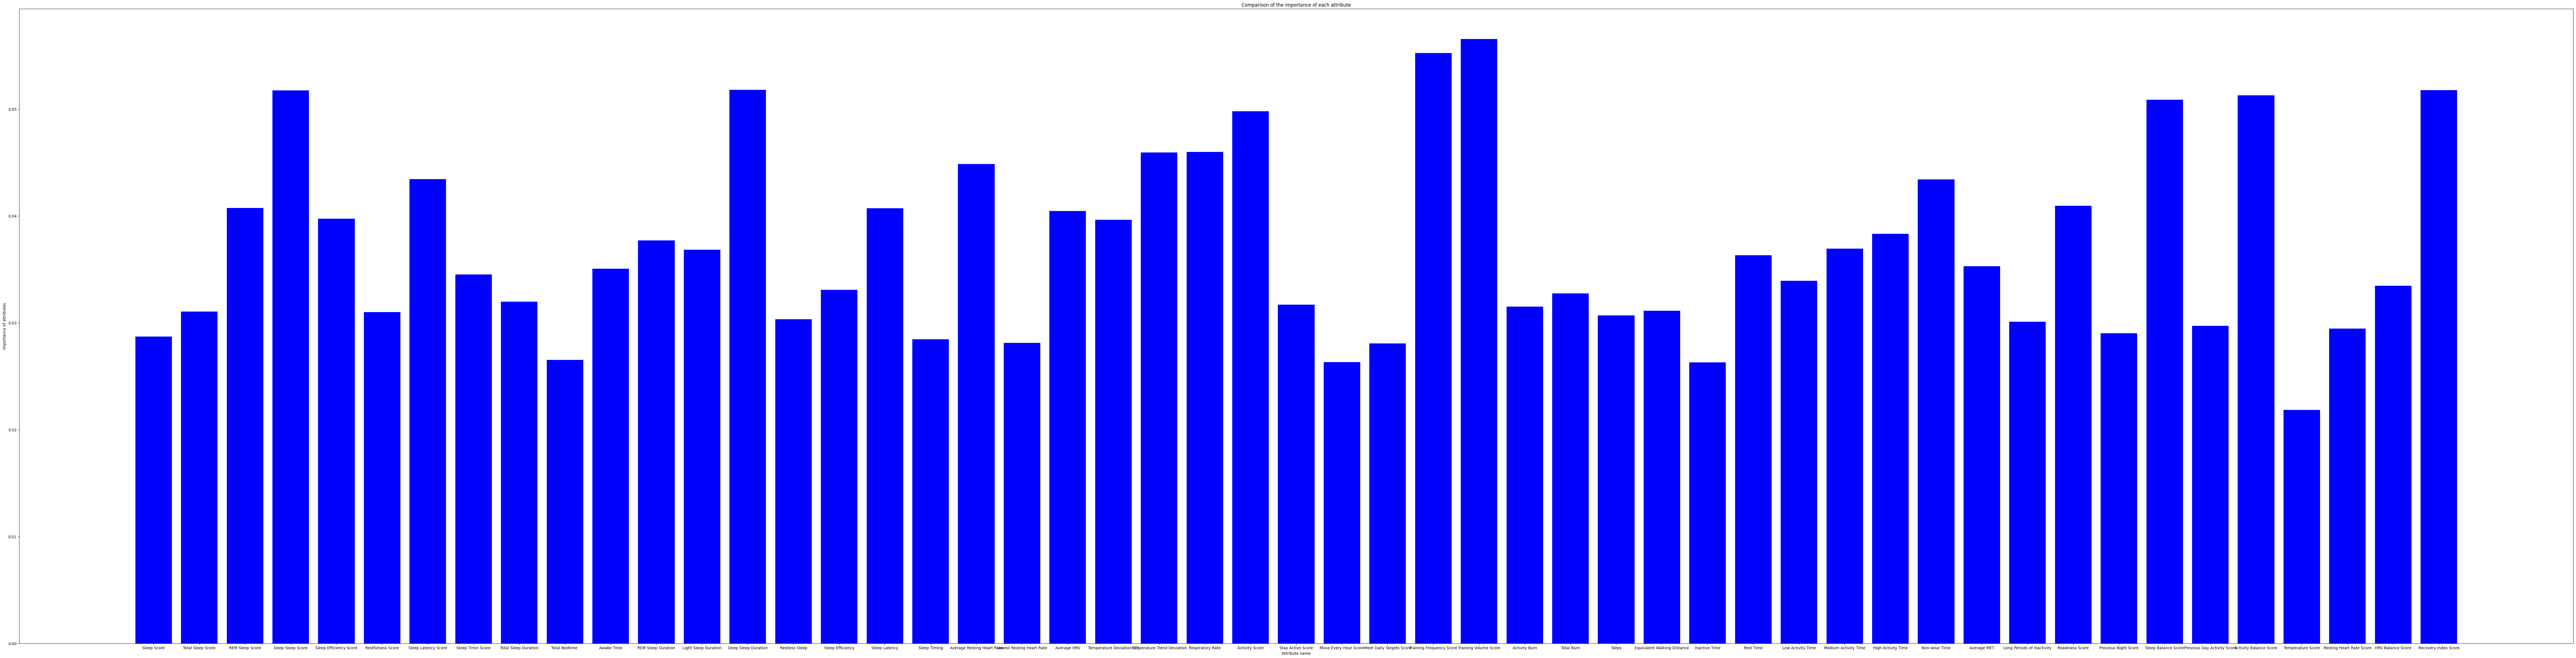

In [31]:
#Importance of attributes

forest_clf = ExtraTreesClassifier(n_estimators=250, random_state=420)
forest_clf.fit(X,y)

imp_features = forest_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_clf.estimators_], axis = 0)
 
plt.figure(figsize = (120,30))
plt.bar(X.columns, std, color = 'blue') 
plt.xlabel('Attribute name') 
plt.ylabel('Importance of attributes') 
plt.title('Comparison of the importance of each attribute') 
plt.show()

In [32]:
df_finlandia.columns

Index(['Sleep Score', 'Total Sleep Score', 'REM Sleep Score',
       'Deep Sleep Score', 'Sleep Efficiency Score', 'Restfulness Score',
       'Sleep Latency Score', 'Sleep Timin Score', 'Total Sleep Duration',
       'Total Bedtime ', 'Awake Time', 'REM Sleep Duration',
       'Light Sleep Duration', 'Deep Sleep Duration', 'Restless Sleep',
       'Sleep Efficiency', 'Sleep Latency', 'Sleep Timing',
       'Average Resting Heart Rate', 'Lowest Resting Heart Rate',
       'Average HRV', 'Temperature Deviation (C)',
       'Temperature Trend Deviation', 'Respiratory Rate', 'Activity Score',
       'Stay Active Score', 'Move Every Hour Score',
       'Meet Daily Targets Score', 'Training Frequency Score',
       'Training Volume Score', 'Activity Burn', 'Total Burn', 'Steps',
       'Equivalent Walking Distance', 'Inactive Time', 'Rest Time',
       'Low Activity Time', 'Medium Activity Time', 'High Activity Time',
       'Non-wear Time', 'Average MET', 'Long Periods of Inactivity',
    

Separating the dataframe into predictors and targets

In [33]:
X = df_finlandia.iloc[:, 0:51].values

y = df_finlandia.iloc[:, 51].values

In [34]:
X.shape, y.shape

((31, 51), (31,))

Treatment of missing value data

In [35]:
#Imputation for completing missing values using k-Nearest Neighbors.

X_imputer = KNNImputer(n_neighbors=2)

X = X_imputer.fit_transform(X)

In [36]:
#Applying standardization to data to get them on the same scale of values

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [37]:
#Converting categorical variables from the target column to numerical indicator variables

y = pd.get_dummies(y).values

Selecting the best parameters for the RandonForestClassifier algorithm

In [38]:
parametersDecisionTree = {'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 5, 10]}

In [39]:
gridSearch = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametersDecisionTree)

gridSearch.fit(X, y)

bestParams = gridSearch.best_params_

print(bestParams)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}


Cross-validation implementation

In [40]:
resultsDecisionTreeClassifier = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    tree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=2, splitter='best')
    scoresTree = cross_val_score(tree, X, y, cv=kfold)
    resultsDecisionTreeClassifier.append(scoresTree.mean())

In [41]:
resultsTree = pd.DataFrame({'DecisionTreeClassifier': resultsDecisionTreeClassifier})

resultsTree.describe()

,DecisionTreeClassifier
count,30.000000
mean,0.398333
std,0.074227
min,0.258333
25%,0.337500
50%,0.391667
75%,0.450000
max,0.558333


In [42]:
# matrix_confusion = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

# plt.figure(figsize=(10,5))
# sns.heatmap(matrix_confusion, annot=True)